In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from loader.ImageLoader import ImageLoader
from visualizer.image_visualization import print_grayscale, print_rgb
from denoiser.Denoiser import ImageDenoiser
import numpy as np

loader = ImageLoader("image0.jpg")

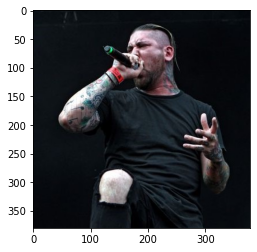

In [21]:
print_rgb(loader.image())


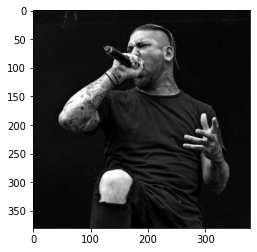

In [22]:
print_grayscale(loader.grayscale())


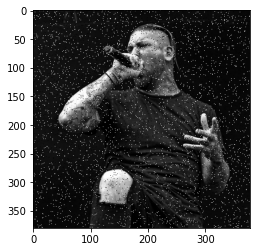

In [23]:
print_grayscale(loader.noisy_image())


In [24]:
graph = loader.graph()
print(list(graph.edges())[1])

The graph had not been built before. Wait until its created...
((0, 0), (1, 0))


In [25]:
denoiser = ImageDenoiser(graph, loader.noisy_image())

In [28]:
graph_alpha_beta = denoiser.alpha_beta_swap()

In [34]:
list(graph_alpha_beta.edges.data())[:100]

[((17, 376), (17, 377), {'capacity': 0.0}),
 ((17, 377), (17, 376), {'capacity': 0.0}),
 ((29, 18), (30, 18), {'capacity': 0.0}),
 ((30, 18), (29, 18), {'capacity': 0.0}),
 ((38, 158), (39, 158), {'capacity': 0.0}),
 ((39, 158), (38, 158), {'capacity': 0.0}),
 ((40, 240), (40, 241), {'capacity': 0.0}),
 ((40, 241), (40, 240), {'capacity': 0.0}),
 ((40, 241), (40, 242), {'capacity': 0.0}),
 ((40, 242), (40, 241), {'capacity': 0.0}),
 ((57, 147), (57, 148), {'capacity': 0.0}),
 ((57, 148), (57, 147), {'capacity': 0.0}),
 ((68, 9), (69, 9), {'capacity': 0.0}),
 ((69, 9), (68, 9), {'capacity': 0.0}),
 ((106, 111), (106, 112), {'capacity': 0.0}),
 ((106, 112), (106, 111), {'capacity': 0.0}),
 ((107, 295), (108, 295), {'capacity': 0.0}),
 ((108, 295), (107, 295), {'capacity': 0.0}),
 ((136, 282), (137, 282), {'capacity': 0.0}),
 ((137, 282), (136, 282), {'capacity': 0.0}),
 ((159, 358), (159, 359), {'capacity': 0.06}),
 ((159, 359), (159, 358), {'capacity': 0.06}),
 ((251, 9), (252, 9), {'ca